In [96]:
import pandas as pd

In [97]:
file = "C:/Users/Ishwarya Sriram/Downloads/KPMG_VI_New_raw_data_update_final.xlsx"
sheet1 = pd.read_excel(file, 
                        sheet_name = 1, 
                        skiprows=1,index_col=0)


In [98]:
sheet1.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [99]:
print(sheet1.isnull().sum())

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


In [100]:
def fn(data):
    return True if data==1.0 else False

col=sheet1.apply(lambda row: fn(row['online_order']),
         axis=1)
    

In [101]:
sheet1['online_order']=col
sheet1.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [102]:
sheet1.isnull().values.any()

True

In [103]:
print(sheet1.isnull().sum())

product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


In [104]:
sheet1.dtypes

product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                         bool
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [105]:
sheet1['product_first_sold_date'] = pd.to_datetime(sheet1['product_first_sold_date'],unit='D', origin='1899-12-30')

In [106]:
sheet1.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [107]:
sheet2 = pd.read_excel(file, 
                        sheet_name = 2, 
                        skiprows=1)
sheet2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [108]:
sheet2=sheet2.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'],axis=1)

In [109]:
sheet2.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [110]:
sheet2.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [111]:
sheet2['gender']=sheet2.gender.str.replace('U','Unspecified')


In [112]:
sheet2.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [113]:
sheet3 = pd.read_excel(file, 
                        sheet_name = 3, index_col=0,
                        skiprows=1)
sheet3.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [114]:
sheet3.default

customer_id
1                                                      "'
2                            <script>alert('hi')</script>
3                                     2018-02-01 00:00:00
4       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
5                                                     NIL
                              ...                        
3996                                                 -100
3997                                             â¦testâ§
3998                                                  NaN
3999                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
4000                                                  0/0
Name: default, Length: 4000, dtype: object

In [115]:
sheet3=sheet3.drop('default',axis=1)

In [116]:
sheet3.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [117]:
sheet3.isnull().sum()

first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [118]:
sheet3.gender.value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [119]:
def gender_repl(data):
    if data=='Femal' or data=='F':
        data='Female'
    elif data == 'M':
        data = 'Male'
    elif data == 'U':
        data = 'Unspecified'
    return data
col=sheet3.apply(lambda row: gender_repl(row['gender']),
         axis=1)
sheet3['gender']=col


In [120]:
sheet3.gender.value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [121]:
sheet3.describe()

,past_3_years_bike_related_purchases,tenure
count,4000.000000,3913.000000
mean,48.890000,10.657041
std,28.715005,5.660146
min,0.000000,1.000000
25%,24.000000,6.000000
50%,48.000000,11.000000
75%,73.000000,15.000000
max,99.000000,22.000000


In [122]:
sheet3.sort_values(by=['DOB']).head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0


In [123]:
sheet3.loc[34,['DOB']]="1943-12-21"

In [124]:
sheet3.loc[34]

first_name                                      Jephthah
last_name                                       Bachmann
gender                                       Unspecified
past_3_years_bike_related_purchases                   59
DOB                                           1943-12-21
job_title                                Legal Assistant
job_industry_category                                 IT
wealth_segment                         Affluent Customer
deceased_indicator                                     N
owns_car                                              No
tenure                                                20
Name: 34, dtype: object

In [125]:
sheet4 = pd.read_excel(file, 
                        sheet_name = 4, index_col=0,
                        skiprows=1)
sheet4.head() 

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [126]:
sheet4.isnull().sum()

address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [127]:

sheet4.postcode.value_counts()

2170    31
2155    30
2145    30
2153    29
2770    26
        ..
4552     1
4555     1
2485     1
3580     1
4421     1
Name: postcode, Length: 873, dtype: int64

Text(0.5, 0, 'Postcode')

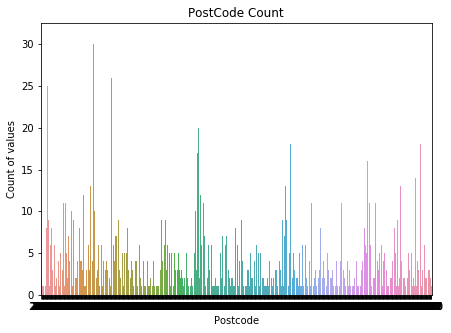

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.title("PostCode Count")
data_plot = sns.barplot(x=sheet4.postcode.unique(), y=sheet4.postcode.value_counts())
plt.ylabel("Count of values")
plt.xlabel("Postcode")